In [33]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data= pd.read_csv('netflix_data.csv', lineterminator= '\n')

In [35]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [36]:
data.info()
#we can see here how every dtype is in accordance with prior expectation but not the 'releade_date' column which is a ibject while it has to be in a date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [37]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [38]:
data.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [39]:
data['Genre'].head(10)
#here we can notice on how there is a space just after any genre, we have to remove that white space.

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object

In [40]:
data.duplicated().sum()
# this is to check if there are any duplicates , since the sum is 0, there is no duplicates. I ran the code withour the sum formual as well, it give answer in booleans.

0

In [41]:
# Insights as of yet
#looks like our dataset has no NaNs 
#Overview, Original_Language and Poster-Url wouldn't be so useful during analysis 
#Release_Date column needs to be casted into date time and to extract only the year value


In [42]:
'''
• Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
• there is noticable outliers in Popularity column
• Vote_Average bettter be categorised for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be hand
'''

"\n• Exploration Summary\n• we have a dataframe consisting of 9827 rows and 9 columns.\n• our dataset looks a bit tidy with no NaNs nor duplicated values.\n• Release_Date column needs to be casted into date time and to extract only the\n• Overview, Original_Languege and Poster-Url wouldn't be so useful during analys\n• there is noticable outliers in Popularity column\n• Vote_Average bettter be categorised for proper analysis.\n• Genre column has comma saperated values and white spaces that needs to be hand\n"

In [43]:
data['Release_Date']= pd.to_datetime(data['Release_Date'])
print(data['Release_Date'].dtype)                                     
                                    

datetime64[ns]


In [44]:
data['Release_Date']= data['Release_Date'].dt.year
print(data['Release_Date'].dtype)                                     
                                    

int32


In [45]:
data.head()
#now i can only see year that too as integer therfore yayayay

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [46]:
#dropping the shitty columns we dont care about
columns= ['Overview', 'Original_Language', 'Poster_Url']

In [47]:
data.drop(columns,axis= 1, inplace=True)

In [48]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [49]:
# categorizing Vote_Average column
# We would cut the Vote_Average values and make 4 categories: popular average
# below_avg not_popular to describe it more using catigorize_col() function
# provided above.


In [50]:
import pandas as pd # Make sure you have pandas imported

#below is what we made like a function ourselves, we can set what paramter we can use as well
def catigorize_col(data, col, labels): # Note: 'catigorize_col' is often spelled 'categorize_col'

    # setting the edges to cut the column accordingly
    edges = [data[col].describe()['min'],  # Correctly indented
             data[col].describe()['25%'],  # Correctly indented
             data[col].describe()['50%'],  # Correctly indented
             data[col].describe()['75%'],  # Correctly indented
             data[col].describe()['max']]  # Correctly indented

    data[col] = pd.cut(data[col], edges, labels=labels, duplicates='drop') # Correctly indented
    return data # Correctly indented

In [51]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(data, 'Vote_Average', labels)
# confirming changes
data['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [52]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [53]:
# exploring column
data['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [54]:
# dropping NaNs
data.dropna(inplace = True)
# confirming
data.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [55]:
# #we'd split genres into a list and then
# explode our dataframe to have only one
# genre per row for ezch movie


In [56]:
# split the strings into lists
data['Genre'] = data['Genre'].str.split(', ')
# explode the lists
data = data.explode('Genre').reset_index(drop=True)
data.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [57]:
# casting column into category
data['Genre'] = data['Genre'].astype('category')
# confirming changes
data['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [58]:
#checking the numnber of rows now which was something around 9500+ before
data.info()
#which now has become a whopping 25000+ holy moly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


more like a filter option of excel but gives count of unique value
data.nunique()

FINALLY WE WILL DO Data Visualization
here, I'd use Matplotlib and seaborn for making some informative visuals to gain insights about our data

# Q1: What is the most frequent genre in the dataset?

In [59]:
# showing stats. on genre column
data['Genre'].describe()


count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

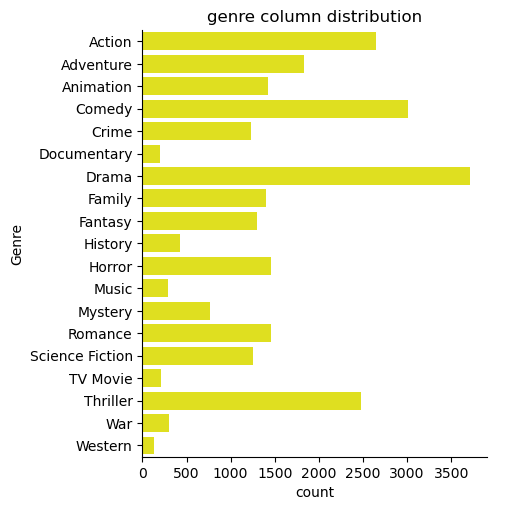

In [60]:
# visualizing genre column
sns.catplot(y = 'Genre', data = data, kind = 'count',
 color = 'yellow')
plt.title('genre column distribution')
plt.show()


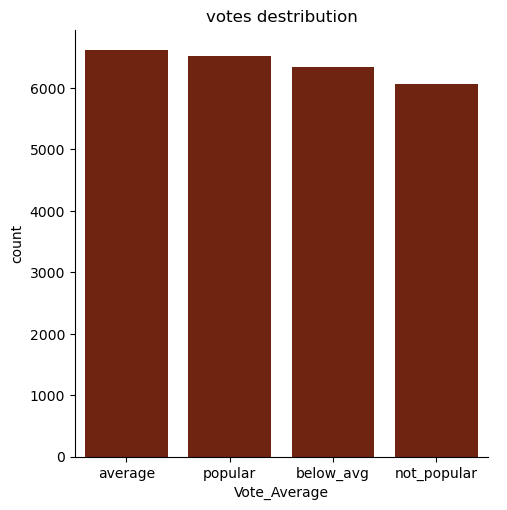

In [61]:
sns.catplot(x = 'Vote_Average', data = data, kind = 'count',
 order = data['Vote_Average'].value_counts().index,
 color = '#7e1b03')
plt.title('votes destribution')
plt.show()

In [62]:
# checking max popularity in dataset
data[data['Popularity'] == data['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [63]:
# checking max popularity in dataset
data[data['Popularity'] == data['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


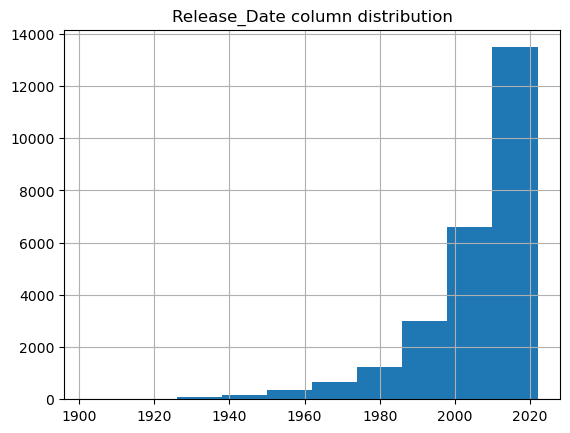

In [64]:
data['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()


Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .
Q3: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.
Q4: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.
